<a href="https://colab.research.google.com/github/SHAGANTI-NANDHITHA/Active-Product-Sales-Analysis/blob/main/Active_Product_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Order_Details = pd.read_csv('Order_details(masked).csv')

# Basic dataset overview
print("Dataset Info:")
print(Order_Details.info())

print("\nSample Rows:")
print(Order_Details.head())

# Convert 'Transaction Date' to datetime format
Order_Details['Transaction Date'] = pd.to_datetime(Order_Details['Transaction Date'])

# Check for missing values
print("\nMissing Values:")
print(Order_Details.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB
None

Sample Rows:
       Name                      Email  \
0  PERSON_1         PERSON_1@gmail.com   
1  PERSON_2  PERSON_2@tataprojects.com   
2  PERSON_3         PERSON_3@gmail.com   
3  PERSON_4         PERSON_4@gmail.com   
4  PERSON_5         PERSON_5@gmail.com   

                                       Product     Transaction Date  
0                                   PRODUCT_75  01/03/2021 00:47:26  
1                                   PRODUCT_75  01/03/2021 02:04:07  
2                                   PRODUCT_63  01/03/2021 09:10:43  
3            

Analysis 1: Hourly Purchase Distribution

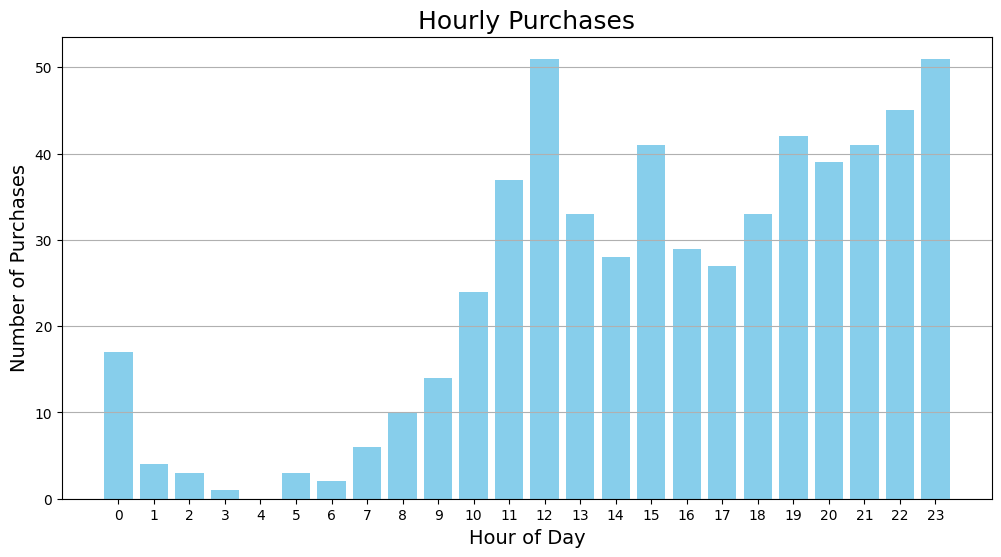

In [2]:
# Extract hour from the transaction date
Order_Details['Hour'] = Order_Details['Transaction Date'].dt.hour

# Count purchases per hour
hourly_purchases = Order_Details['Hour'].value_counts().sort_index()

# Plot hourly purchases
plt.figure(figsize=(12, 6))
plt.bar(hourly_purchases.index, hourly_purchases.values, color='skyblue')
plt.title('Hourly Purchases', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


Analysis 2: Weekly Trends

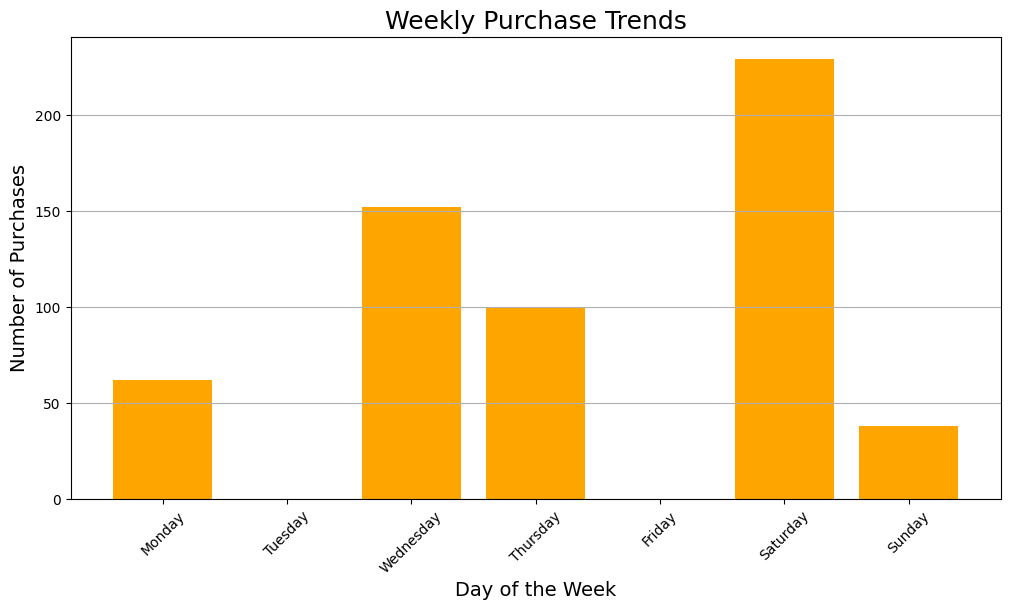

In [3]:
# Extract day of the week
Order_Details['Day of Week'] = Order_Details['Transaction Date'].dt.day_name()

# Count purchases per day of the week
weekly_purchases = Order_Details['Day of Week'].value_counts()

# Reorder days for a meaningful plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_purchases = weekly_purchases.reindex(day_order)

# Plot weekly purchases
plt.figure(figsize=(12, 6))
plt.bar(weekly_purchases.index, weekly_purchases.values, color='orange')
plt.title('Weekly Purchase Trends', fontsize=18)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Analysis 3: Popular Products

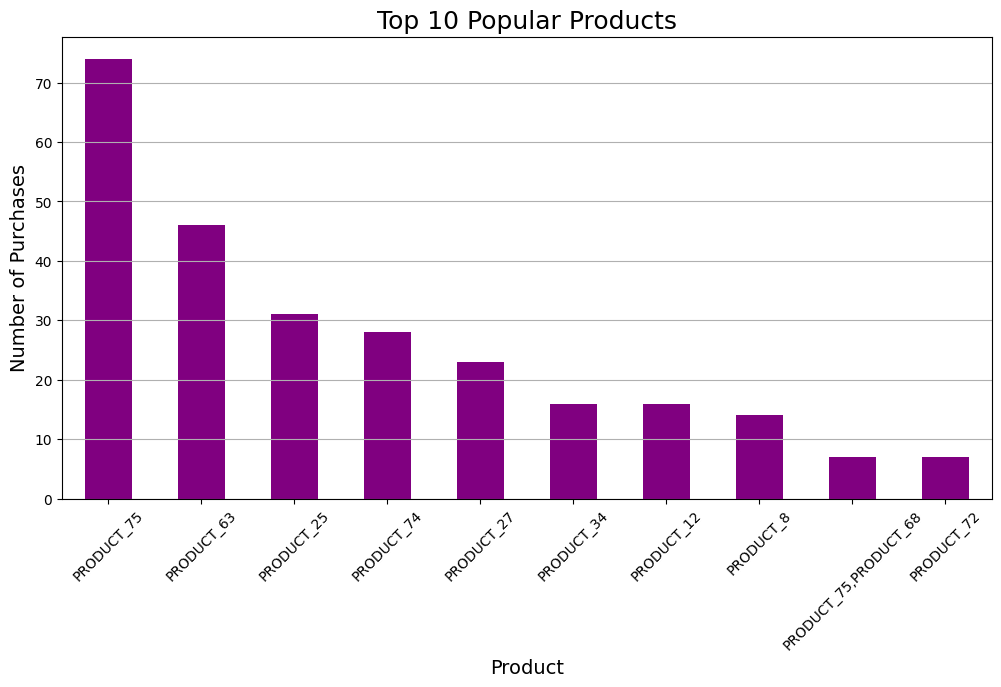

In [4]:
# Count purchases for each product
popular_products = Order_Details['Product'].value_counts().head(10)

# Plot popular products
plt.figure(figsize=(12, 6))
popular_products.plot(kind='bar', color='purple')
plt.title('Top 10 Popular Products', fontsize=18)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Analysis 4: Customer Engagement

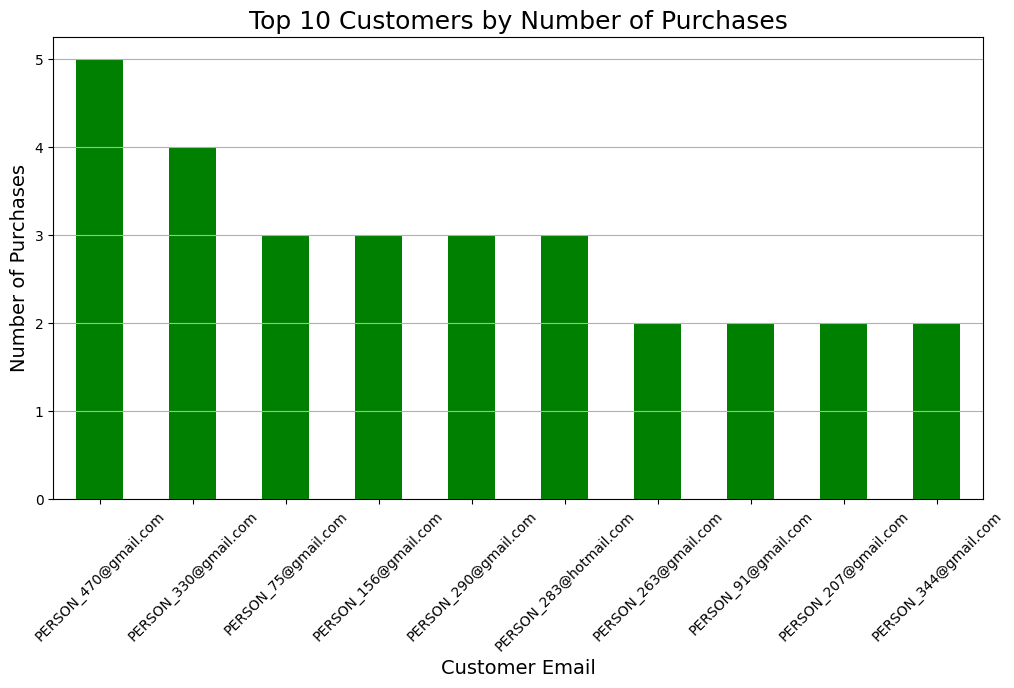

In [5]:
# Count purchases by customer
customer_purchases = Order_Details['Email'].value_counts().head(10)

# Plot top customers
plt.figure(figsize=(12, 6))
customer_purchases.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Number of Purchases', fontsize=18)
plt.xlabel('Customer Email', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Analysis 5: Time Series Analysis

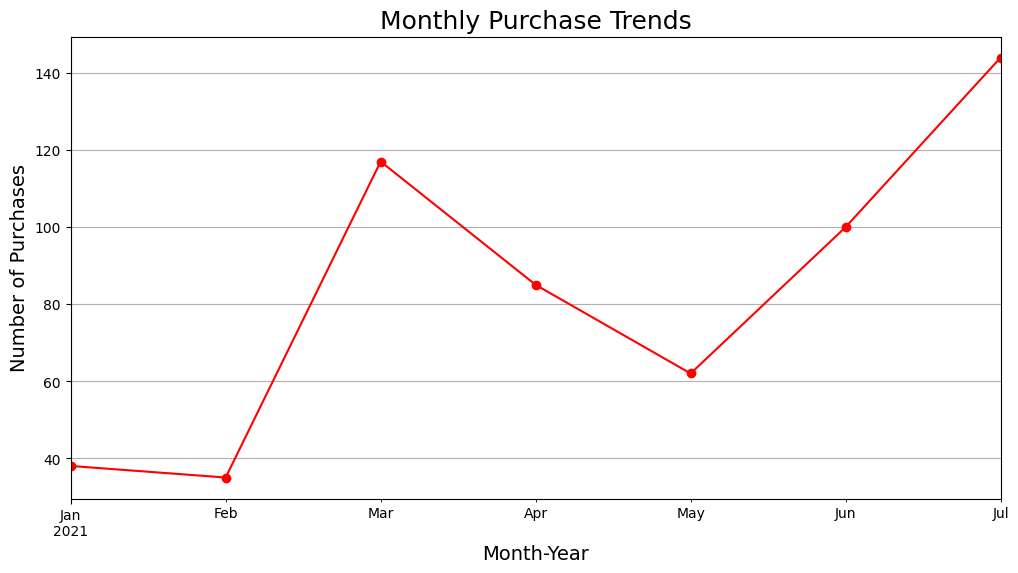

In [6]:
# Extract month and year from the transaction date
Order_Details['Month-Year'] = Order_Details['Transaction Date'].dt.to_period('M')

# Count purchases per month
monthly_purchases = Order_Details['Month-Year'].value_counts().sort_index()

# Plot monthly purchases
plt.figure(figsize=(12, 6))
monthly_purchases.plot(kind='line', marker='o', color='red')
plt.title('Monthly Purchase Trends', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)
plt.grid()
plt.show()


Analysis 6: Pivot Tables for Deeper Insights

Day of Week                                         Monday  Saturday  Sunday  \
Product                                                                        
PRODUCT_11,PRODUCT_25                                    0         1       0   
PRODUCT_11,PRODUCT_54,PRODUCT_25,PRODUCT_80              0         0       0   
PRODUCT_12                                               2         8       0   
PRODUCT_12,PRODUCT_24                                    0         1       0   
PRODUCT_12,PRODUCT_31                                    0         1       0   
...                                                    ...       ...     ...   
PRODUCT_92,PRODUCT_2,PRODUCT_41,PRODUCT_3,PRODU...       0         1       0   
PRODUCT_92,PRODUCT_2,PRODUCT_41,PRODUCT_3,PRODU...       0         1       0   
PRODUCT_93                                               0         1       0   
PRODUCT_95                                               0         0       0   
PRODUCT_95,PRODUCT_51                   

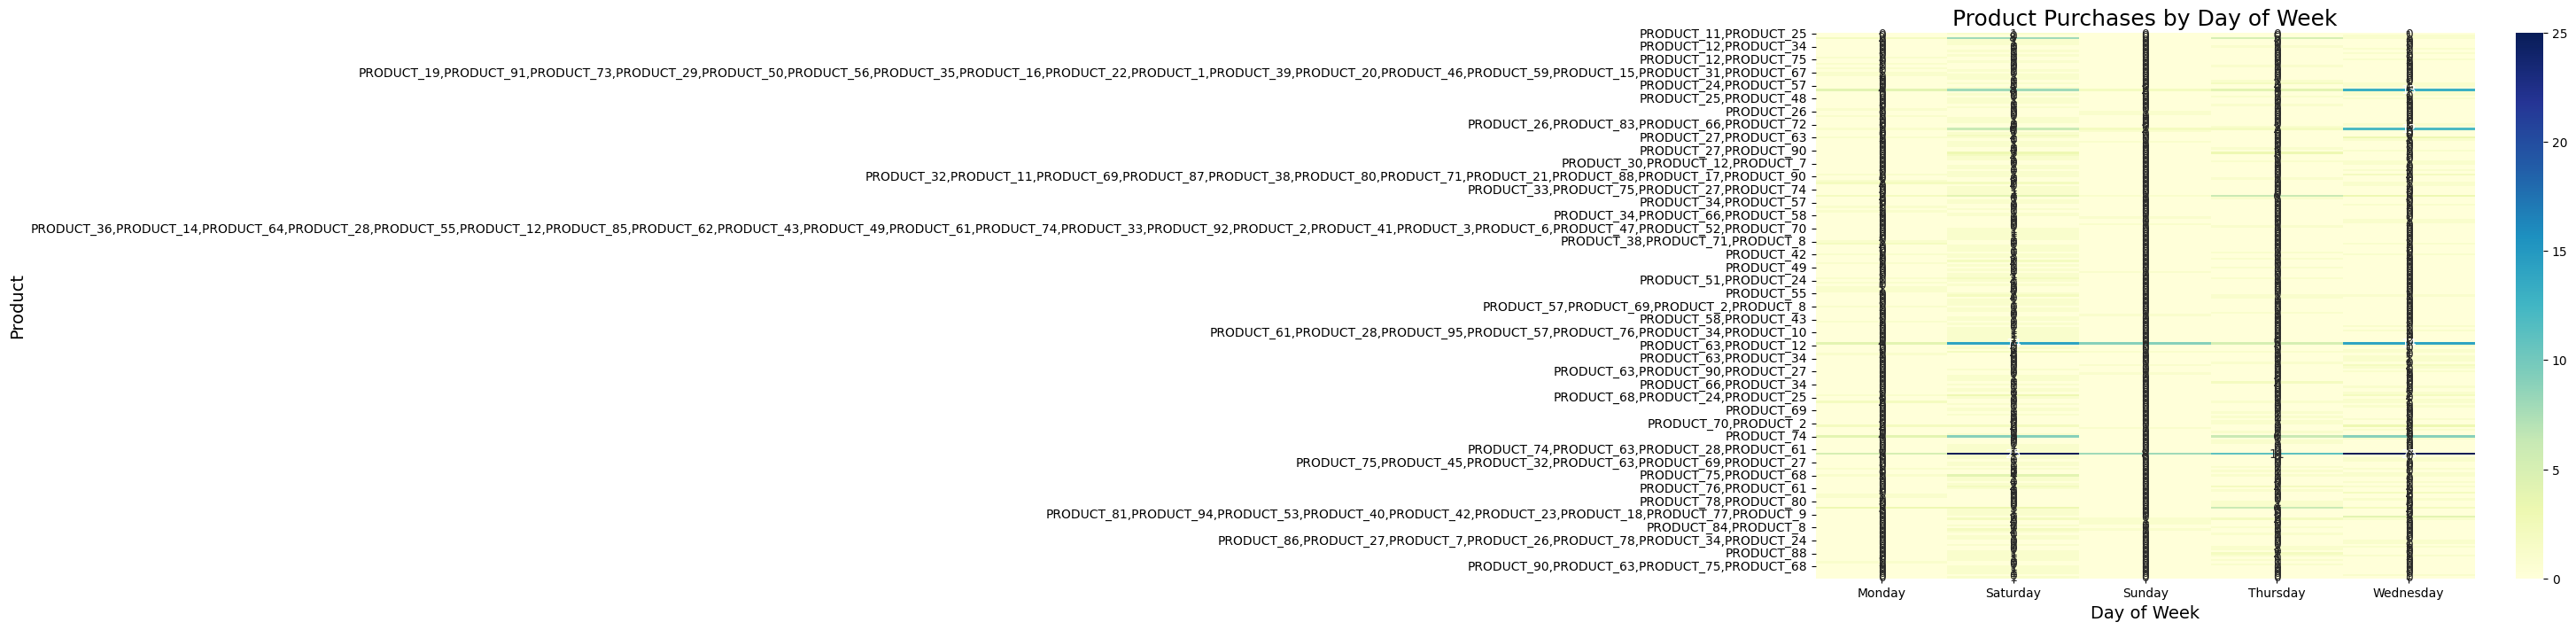

In [7]:
# Pivot table: purchases by product and day of the week
pivot_table = pd.pivot_table(Order_Details, index='Product', columns='Day of Week', values='Transaction Date', aggfunc='count', fill_value=0)

print(pivot_table)

# Heatmap visualization (requires seaborn)
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Product Purchases by Day of Week', fontsize=18)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.show()


Analysis 7: Time Spent Between Purchases

count                            56
mean     37 days 18:48:25.142857143
std      51 days 05:54:06.623559199
min                 0 days 00:03:15
25%                 0 days 00:23:36
50%                 0 days 08:30:02
75%         89 days 01:35:34.750000
max               181 days 05:12:16
Name: Time Since Last Purchase, dtype: object


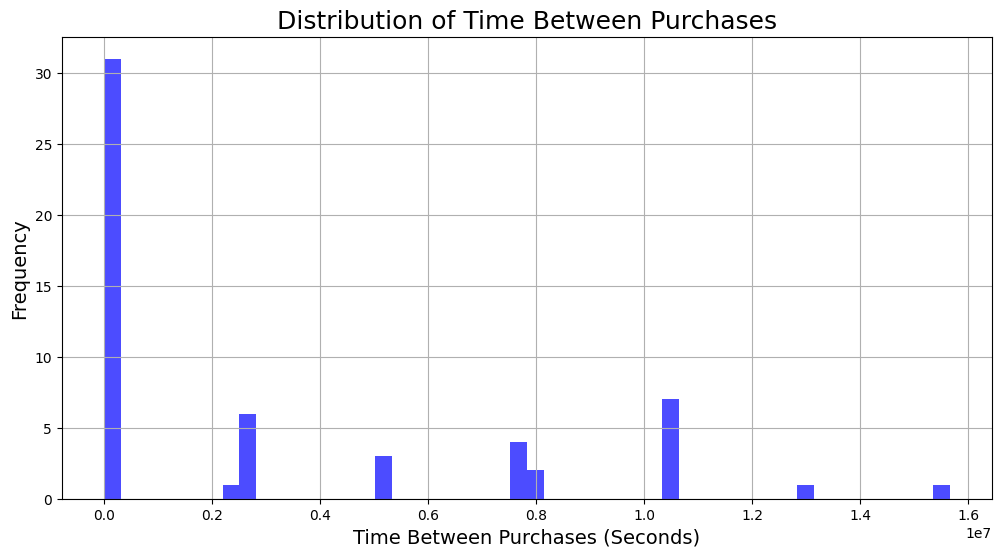

In [8]:
# Calculate time between transactions for each customer
Order_Details = Order_Details.sort_values(by=['Email', 'Transaction Date'])
Order_Details['Time Since Last Purchase'] = Order_Details.groupby('Email')['Transaction Date'].diff()

# Summary statistics
print(Order_Details['Time Since Last Purchase'].describe())

# Plot histogram of time intervals
plt.figure(figsize=(12, 6))
Order_Details['Time Since Last Purchase'].dt.total_seconds().dropna().plot(kind='hist', bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Time Between Purchases', fontsize=18)
plt.xlabel('Time Between Purchases (Seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()
